## Segment 5 - Introduction to NLP

In [1]:
import nltk

In [2]:
text = "On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks. The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share."

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANTHONY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h3>Sentence Tokenizer</h3>

In [3]:
from nltk.tokenize import sent_tokenize
sent_tk = sent_tokenize(text)
print("Sentence tokenizing the text: \n")
print(sent_tk)

Sentence tokenizing the text: 

['On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks.', 'The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share.']


### Word Tokenizer

In [4]:
from nltk.tokenize import word_tokenize
word_tk = word_tokenize(text)      # OR word_tokenize(" hii  there or text")
print("Word tokenizing the text: \n")
print(word_tk)

Word tokenizing the text: 

['On', 'Wednesday', ',', 'the', 'Association', 'for', 'Computing', 'Machinery', ',', 'the', 'world', '’', 's', 'largest', 'society', 'of', 'computing', 'professionals', ',', 'announced', 'that', 'Hinton', ',', 'LeCun', 'and', 'Bengio', 'had', 'won', 'this', 'year', '’', 's', 'Turing', 'Award', 'for', 'their', 'work', 'on', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'which', 'was', 'introduced', 'in', '1966', ',', 'is', 'often', 'called', 'the', 'Nobel', 'Prize', 'of', 'computing', ',', 'and', 'it', 'includes', 'a', '$', '1', 'million', 'prize', ',', 'which', 'the', 'three', 'scientists', 'will', 'share', '.']


### REGEX TOKENIZER
The regexp_tokenize uses regular expressions to tokenize the string, giving you more granular control over the process. 

In [5]:
from nltk.tokenize import regexp_tokenize
tweets="'This is the best #nlp exercise ive found online! #python','#NLP is super fun! <3 #learning','Thanks @datacamp :) #nlp #python'"
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"([@#]\w+)"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets, pattern1)
hashtags

['#nlp', '#python', '#NLP', '#learning', '@datacamp', '#nlp', '#python']

EMOJI TOKENIZING

In [6]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize

german_text="Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


### TWEEET TOKENIZER
And the tweettokenizer does neat things like recognize hashtags, mentions and when you have too many punctuation symbols following a sentence.

In [10]:
from nltk.tokenize import TweetTokenizer
tweets="This is the best #nlp exercise ive found online! #python','#NLP is super fun! <3 #learning','Thanks @datacamp :) #nlp #python"
word_tokenized = word_tokenize(tweets)  
print(word_tokenized)
tknzr = TweetTokenizer()

# Use the TweetTokenizer to tokenize all tweets into one list
all_tokens = [tknzr.tokenize(t) for t in word_tokenized]
print(all_tokens)
    


['This', 'is', 'the', 'best', '#', 'nlp', 'exercise', 'ive', 'found', 'online', '!', '#', 'python', "'", ',', "'", '#', 'NLP', 'is', 'super', 'fun', '!', '<', '3', '#', 'learning', "'", ',', "'Thanks", '@', 'datacamp', ':', ')', '#', 'nlp', '#', 'python']
[['This'], ['is'], ['the'], ['best'], ['#'], ['nlp'], ['exercise'], ['ive'], ['found'], ['online'], ['!'], ['#'], ['python'], ["'"], [','], ["'"], ['#'], ['NLP'], ['is'], ['super'], ['fun'], ['!'], ['<'], ['3'], ['#'], ['learning'], ["'"], [','], ["'", 'Thanks'], ['@'], ['datacamp'], [':'], [')'], ['#'], ['nlp'], ['#'], ['python']]


In [12]:
######################################  OR #####################

twee = tknzr.tokenize(tweets)
twee

['This',
 'is',
 'the',
 'best',
 '#nlp',
 'exercise',
 'ive',
 'found',
 'online',
 '!',
 '#python',
 "'",
 ',',
 "'",
 '#NLP',
 'is',
 'super',
 'fun',
 '!',
 '<3',
 '#learning',
 "'",
 ',',
 "'",
 'Thanks',
 '@datacamp',
 ':)',
 '#nlp',
 '#python']

In [13]:
for i in twee:
    if i[0]=='#':
        print(i)

#nlp
#python
#NLP
#learning
#nlp
#python


### FILTERING THE TOKENS

In [17]:
## tweets_list contain 3 string in a list
tweets_list=["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

print(tokens)

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# Print the last item in each list
print('\nitem in alphabetic list: \t', letters)
print('\n item in list of alphanumerics:\t ', let_digits)
print('\nitem in the list of digits: ', digits)




[['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', "'entertainment", "'", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse'], ['@', 'VirginAmerica', 'Hey', ',', 'first', 'time', 'flyer', 'next', 'week', '-', 'excited', '!', 'But', 'I', "'m", 'having', 'a', 'hard', 'time', 'getting', 'my', 'flights', 'added', 'to', 'my', 'Elevate', 'account', '.', 'Help', '?'], ['@', 'united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', '.', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', ',', 'I', 'am', 'not', 'thrilled', '.', 'Loved', 'the', 'agent', ',', 'though', '.']]

item in alphabetic list: 	 [['VirginAmerica', 'it', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse'], ['VirginAmerica', 'Hey', 'first', 'time', 'flyer', 'next', 'week', 'excited', 'But', 'I', 'having', 'a', 'hard', 'time', 'getting', 'my',

In [32]:
alpha_only = [t for t in tokens if t.isalpha()]
alpha_only
# this will only work when word_tk is a list....ie word_tk is tokenized from a single string...
#  if more than that have to follow the above example....

AttributeError: 'list' object has no attribute 'isalpha'

### Tokenizing a panda df....

### Removing stop words

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANTHONY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords

sw = set(stopwords.words("english"))
print("Stop words in English language are: \n")
print(sw)

Stop words in English language are: 

{'just', 'about', "she's", 'over', 'their', 'his', 'or', "couldn't", 'some', 'we', 'again', 'has', 'its', 'only', 'own', "aren't", 'mightn', 'where', 'how', 'when', 'here', 'out', 'more', 'shouldn', 'from', 'to', 'she', "needn't", 'been', "don't", 'hadn', "mustn't", 'did', 'with', 'through', "you're", "you've", 'those', 'him', "wouldn't", 'no', 'won', 'the', 'all', 'few', 'such', 'same', 'there', 'too', 'it', 'does', 'ourselves', 'that', 'them', "shan't", 'why', 'our', 'do', "didn't", 'than', 'they', 'after', 'ours', 'ain', "you'd", 'further', 'needn', 'of', 'which', 'hasn', 'as', 'up', 'is', 'down', 'isn', 's', 'himself', 'on', 'nor', 'be', 'can', 'while', 'couldn', 'so', 'then', 'was', 'you', 'are', 'below', "weren't", 'having', 'by', "haven't", 'themselves', 'd', "shouldn't", 'a', 'yourself', "should've", 'under', 'shan', 'have', 'he', 'once', 'weren', 'these', 'what', 'aren', 'at', 'each', 'any', 'mustn', 'her', "hadn't", 'itself', 'into', 'was

In [34]:
word_tk

['On',
 'Wednesday',
 ',',
 'the',
 'Association',
 'for',
 'Computing',
 'Machinery',
 ',',
 'the',
 'world',
 '’',
 's',
 'largest',
 'society',
 'of',
 'computing',
 'professionals',
 ',',
 'announced',
 'that',
 'Hinton',
 ',',
 'LeCun',
 'and',
 'Bengio',
 'had',
 'won',
 'this',
 'year',
 '’',
 's',
 'Turing',
 'Award',
 'for',
 'their',
 'work',
 'on',
 'neural',
 'networks',
 '.',
 'The',
 'Turing',
 'Award',
 ',',
 'which',
 'was',
 'introduced',
 'in',
 '1966',
 ',',
 'is',
 'often',
 'called',
 'the',
 'Nobel',
 'Prize',
 'of',
 'computing',
 ',',
 'and',
 'it',
 'includes',
 'a',
 '$',
 '1',
 'million',
 'prize',
 ',',
 'which',
 'the',
 'three',
 'scientists',
 'will',
 'share',
 '.']

In [35]:
filtered_words = [w for w in word_tk if not w in sw]

print("The text after removing stop words \n")
print(filtered_words)

### but if we see here we are also having , . '  etc in the filtered text... so we will remove that too
word_tk

The text after removing stop words 

['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professionals', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientists', 'share', '.']


['On',
 'Wednesday',
 ',',
 'the',
 'Association',
 'for',
 'Computing',
 'Machinery',
 ',',
 'the',
 'world',
 '’',
 's',
 'largest',
 'society',
 'of',
 'computing',
 'professionals',
 ',',
 'announced',
 'that',
 'Hinton',
 ',',
 'LeCun',
 'and',
 'Bengio',
 'had',
 'won',
 'this',
 'year',
 '’',
 's',
 'Turing',
 'Award',
 'for',
 'their',
 'work',
 'on',
 'neural',
 'networks',
 '.',
 'The',
 'Turing',
 'Award',
 ',',
 'which',
 'was',
 'introduced',
 'in',
 '1966',
 ',',
 'is',
 'often',
 'called',
 'the',
 'Nobel',
 'Prize',
 'of',
 'computing',
 ',',
 'and',
 'it',
 'includes',
 'a',
 '$',
 '1',
 'million',
 'prize',
 ',',
 'which',
 'the',
 'three',
 'scientists',
 'will',
 'share',
 '.']

In [37]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in word_tk if t.isalpha()]

print(alpha_only)

again_filtered_words = [w for w in alpha_only if not w in sw]

print("\nThe text after removing stop words and unwanted punctuations\n")
print(again_filtered_words)

['On', 'Wednesday', 'the', 'Association', 'for', 'Computing', 'Machinery', 'the', 'world', 's', 'largest', 'society', 'of', 'computing', 'professionals', 'announced', 'that', 'Hinton', 'LeCun', 'and', 'Bengio', 'had', 'won', 'this', 'year', 's', 'Turing', 'Award', 'for', 'their', 'work', 'on', 'neural', 'networks', 'The', 'Turing', 'Award', 'which', 'was', 'introduced', 'in', 'is', 'often', 'called', 'the', 'Nobel', 'Prize', 'of', 'computing', 'and', 'it', 'includes', 'a', 'million', 'prize', 'which', 'the', 'three', 'scientists', 'will', 'share']

The text after removing stop words and unwanted punctuations

['On', 'Wednesday', 'Association', 'Computing', 'Machinery', 'world', 'largest', 'society', 'computing', 'professionals', 'announced', 'Hinton', 'LeCun', 'Bengio', 'year', 'Turing', 'Award', 'work', 'neural', 'networks', 'The', 'Turing', 'Award', 'introduced', 'often', 'called', 'Nobel', 'Prize', 'computing', 'includes', 'million', 'prize', 'three', 'scientists', 'share']


In [31]:
#or below can also be used
''''
alp=[]
for t in word_tk:
        if t.isalpha():
              alp.append(t)''''

SyntaxError: EOL while scanning string literal (<ipython-input-31-d15e4ea134cb>, line 6)

In [25]:

###############  REMOVING STOP WORDS FROM THIS LIST  ###########################

tweets_list=["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
 "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
 '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(item) for item in tweets_list]

print(tokens)

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]

again_filtered_ = [[w for w in alpha_w if not w in sw] for alpha_w in letters]   ###########



again_filtered_


[['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', "'entertainment", "'", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse'], ['@', 'VirginAmerica', 'Hey', ',', 'first', 'time', 'flyer', 'next', 'week', '-', 'excited', '!', 'But', 'I', "'m", 'having', 'a', 'hard', 'time', 'getting', 'my', 'flights', 'added', 'to', 'my', 'Elevate', 'account', '.', 'Help', '?'], ['@', 'united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', '.', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', ',', 'I', 'am', 'not', 'thrilled', '.', 'Loved', 'the', 'agent', ',', 'though', '.']]


[['VirginAmerica',
  'really',
  'aggressive',
  'blast',
  'obnoxious',
  'guests',
  'faces',
  'amp',
  'little',
  'recourse'],
 ['VirginAmerica',
  'Hey',
  'first',
  'time',
  'flyer',
  'next',
  'week',
  'excited',
  'But',
  'I',
  'hard',
  'time',
  'getting',
  'flights',
  'added',
  'Elevate',
  'account',
  'Help'],
 ['united',
  'Change',
  'made',
  'hours',
  'For',
  'something',
  'taken',
  'seconds',
  'online',
  'I',
  'thrilled',
  'Loved',
  'agent',
  'though']]

<h3>Stemming</h3>

In [22]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

port_stem = PorterStemmer()

In [38]:
stemmed_words = []

for w in again_filtered_words:
    stemmed_words.append(port_stem.stem(w))
    
print("Filtered Sentence(only aphanumeric): \n", again_filtered_words, "\n")
print("Stemmed Sentence: \n", stemmed_words)

Filtered Sentence(only aphanumeric): 
 ['On', 'Wednesday', 'Association', 'Computing', 'Machinery', 'world', 'largest', 'society', 'computing', 'professionals', 'announced', 'Hinton', 'LeCun', 'Bengio', 'year', 'Turing', 'Award', 'work', 'neural', 'networks', 'The', 'Turing', 'Award', 'introduced', 'often', 'called', 'Nobel', 'Prize', 'computing', 'includes', 'million', 'prize', 'three', 'scientists', 'share'] 

Stemmed Sentence: 
 ['On', 'wednesday', 'associ', 'comput', 'machineri', 'world', 'largest', 'societi', 'comput', 'profession', 'announc', 'hinton', 'lecun', 'bengio', 'year', 'ture', 'award', 'work', 'neural', 'network', 'the', 'ture', 'award', 'introduc', 'often', 'call', 'nobel', 'prize', 'comput', 'includ', 'million', 'prize', 'three', 'scientist', 'share']


#### Non English Stemming
Stemming is possible using other languages as well, such as Danish, Dutch, French, Spanish, German, etc. To use foreign language stemmers we need to use the SnowballStemmer package. We can specify in the stemmer the foreign language we want to use. Then we apply the stem function on our string.

In [38]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# Import the Spanish SnowballStemmer
SpanishStemmer = SnowballStemmer("spanish")

spanish_stemmed_words = []

print("stemmed spanish word is:",SpanishStemmer.stem("comiendo"))

for w in again_filtered_words:
    spanish_stemmed_words.append(SpanishStemmer.stem(w))

# Print the first item of the stemmed tokenss
print(spanish_stemmed_words)

stemmed spanish word is: com
['on', 'wednesday', 'association', 'computing', 'machinery', 'world', 'largest', 'society', 'computing', 'professionals', 'announc', 'hinton', 'lecun', 'bengi', 'year', 'turing', 'award', 'work', 'neural', 'networks', 'the', 'turing', 'award', 'introduc', 'often', 'call', 'nobel', 'priz', 'computing', 'includ', 'million', 'priz', 'thre', 'scientists', 'shar']


# Lemmatizing

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANTHONY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

lemm_words = []

for i in range(len(again_filtered_words)):
    lemm_words.append(lem.lemmatize(again_filtered_words[i]))
print("Stemmed Sentence: \n", stemmed_words)    
print("Lemmatized sentence:\n",lemm_words)

Stemmed Sentence: 
 ['On', 'wednesday', 'associ', 'comput', 'machineri', 'world', 'largest', 'societi', 'comput', 'profession', 'announc', 'hinton', 'lecun', 'bengio', 'year', 'ture', 'award', 'work', 'neural', 'network', 'the', 'ture', 'award', 'introduc', 'often', 'call', 'nobel', 'prize', 'comput', 'includ', 'million', 'prize', 'three', 'scientist', 'share']
Lemmatized sentence:
 ['On', 'Wednesday', 'Association', 'Computing', 'Machinery', 'world', 'largest', 'society', 'computing', 'professional', 'announced', 'Hinton', 'LeCun', 'Bengio', 'year', 'Turing', 'Award', 'work', 'neural', 'network', 'The', 'Turing', 'Award', 'introduced', 'often', 'called', 'Nobel', 'Prize', 'computing', 'includes', 'million', 'prize', 'three', 'scientist', 'share']


In [40]:
stemmm=[port_stem.stem(i) for i in again_filtered_words]
stemmm

['On',
 'wednesday',
 'associ',
 'comput',
 'machineri',
 'world',
 'largest',
 'societi',
 'comput',
 'profession',
 'announc',
 'hinton',
 'lecun',
 'bengio',
 'year',
 'ture',
 'award',
 'work',
 'neural',
 'network',
 'the',
 'ture',
 'award',
 'introduc',
 'often',
 'call',
 'nobel',
 'prize',
 'comput',
 'includ',
 'million',
 'prize',
 'three',
 'scientist',
 'share']

Your task is to clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.

In [42]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [45]:
blog="'\nTwenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.\n'"
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords

doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas if lemma.isalpha()]

# Print string after text cleaning
print(' '.join(a_lemmas))

twenty first century politic have witness an alarm rise of populism in the and Europe the first warning sign come with the UK Brexit Referendum vote in swinge in the way of Leave this be follow by a stupendous victory by billionaire Donald Trump to become the President of the United States in November since then Europe have see a steady rise in populist and far right party that have capitalize on Europe Immigration Crisis to raise nationalist and anti europe sentiment some instance include Alternative for Germany AfD win of all seat and enter the Bundestag thus upset Germany political order for the first time since the Second World War the success of the five Star Movement in Italy and the surge in popularity of neo nazism and neo fascism in country such as Hungary Czech Republic Poland and Austria


<h3>Parts of Speech Tagging</h3>


In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ANTHONY\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
from nltk import pos_tag
pos_tagged_words = pos_tag(word_tk)

print(pos_tagged_words)

[('On', 'IN'), ('Wednesday', 'NNP'), (',', ','), ('the', 'DT'), ('Association', 'NNP'), ('for', 'IN'), ('Computing', 'VBG'), ('Machinery', 'NNP'), (',', ','), ('the', 'DT'), ('world', 'NN'), ('’', 'NNP'), ('s', 'RB'), ('largest', 'JJS'), ('society', 'NN'), ('of', 'IN'), ('computing', 'VBG'), ('professionals', 'NNS'), (',', ','), ('announced', 'VBD'), ('that', 'IN'), ('Hinton', 'NNP'), (',', ','), ('LeCun', 'NNP'), ('and', 'CC'), ('Bengio', 'NNP'), ('had', 'VBD'), ('won', 'VBN'), ('this', 'DT'), ('year', 'NN'), ('’', 'VBZ'), ('s', 'JJ'), ('Turing', 'NNP'), ('Award', 'NNP'), ('for', 'IN'), ('their', 'PRP$'), ('work', 'NN'), ('on', 'IN'), ('neural', 'JJ'), ('networks', 'NNS'), ('.', '.'), ('The', 'DT'), ('Turing', 'NNP'), ('Award', 'NNP'), (',', ','), ('which', 'WDT'), ('was', 'VBD'), ('introduced', 'VBN'), ('in', 'IN'), ('1966', 'CD'), (',', ','), ('is', 'VBZ'), ('often', 'RB'), ('called', 'VBN'), ('the', 'DT'), ('Nobel', 'NNP'), ('Prize', 'NNP'), ('of', 'IN'), ('computing', 'NN'), (',',

<h3>Frequency Distribution Plots</h3>


In [27]:
from nltk.probability import FreqDist
fd = FreqDist(word_tk)
print(fd)

<FreqDist with 56 samples and 76 outcomes>


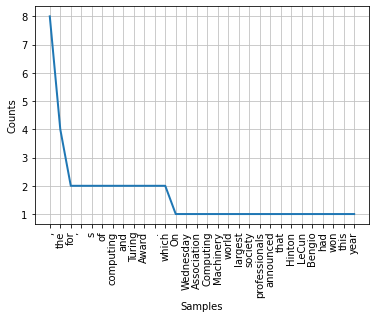

In [173]:
import matplotlib.pyplot as plt
fd.plot(30, cumulative=False)
plt.show()

for getting distribution of alphabets...............

In [49]:
text

'On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks. The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share.'

In [174]:
fd_alpha = FreqDist(text)    ######## we will just use the sentence
print(fd_alpha)


<FreqDist with 41 samples and 387 outcomes>


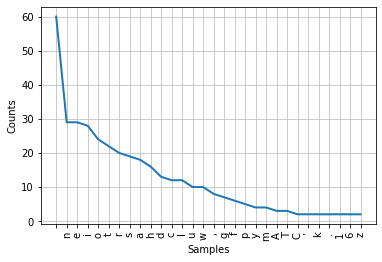

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [175]:
fd_alpha.plot(30, cumulative=False)

###INSTRUCTIONS

Split the script holy_grail into lines using the newline ('\n') character.
Use re.sub() inside a list comprehension to replace the prompts such as ARTHUR: and SOLDIER #1. The pattern has been written for you.
Use a list comprehension to tokenize lines with regexp_tokenize(), keeping only words. Recall that the pattern for words is "\w+".
Use a list comprehension to create a list of line lengths called line_num_words.
Use t_line as your iterator variable to iterate over tokenized_lines, and then len() function to compute line lengths.
Plot a histogram of line_num_words using plt.hist(). Don't forgot to use plt.show() as well to display the plot.


['ZOOT: Oh, you must see the doctors immediately!  No, no, please!  Lie down. [clap clap] ', 'PIGLET: Well, what seems to be the trouble?', "GALAHAD: They're doctors?!", 'ZOOT: Uh, they have a basic medical training, yes.', 'GALAHAD: B-- but--', 'ZOOT: Oh, come, come.  You must try to rest.  Doctor Piglet!  Doctor Winston!  Practice your art.', 'WINSTON: Try to relax.', "GALAHAD: Are you sure that's absolutely necessary?", 'PIGLET: We must examine you.', "GALAHAD: There's nothing wrong with that!", 'PIGLET: Please.  We are doctors.', 'GALAHAD: Look!  This cannot be.  I am sworn to chastity.', 'PIGLET: Back to your bed!  At once!', 'GALAHAD: Torment me no longer.  I have seen the Grail!', "PIGLET: There's no grail here.", 'GALAHAD: I have seen it!  I have seen it! [clank] I have seen--', 'GIRLS: Hello.', 'GALAHAD: Oh.', 'GIRLS: Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  H

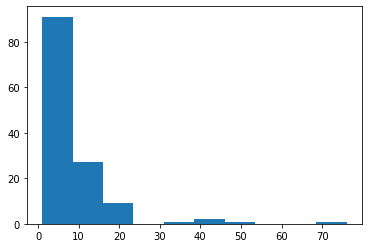

In [52]:
import regex as re
import matplotlib.pyplot as plt

holy_grail = """ZOOT: Oh, you must see the doctors immediately!  No, no, please!  Lie down. [clap clap] 
PIGLET: Well, what seems to be the trouble?
GALAHAD: They're doctors?!
ZOOT: Uh, they have a basic medical training, yes.
GALAHAD: B-- but--
ZOOT: Oh, come, come.  You must try to rest.  Doctor Piglet!  Doctor Winston!  Practice your art.
WINSTON: Try to relax.
GALAHAD: Are you sure that's absolutely necessary?
PIGLET: We must examine you.
GALAHAD: There's nothing wrong with that!
PIGLET: Please.  We are doctors.
GALAHAD: Look!  This cannot be.  I am sworn to chastity.
PIGLET: Back to your bed!  At once!
GALAHAD: Torment me no longer.  I have seen the Grail!
PIGLET: There's no grail here.
GALAHAD: I have seen it!  I have seen it! [clank] I have seen--
GIRLS: Hello.
GALAHAD: Oh.
GIRLS: Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.
GALAHAD: Zoot!
DINGO: No, I am Zoot's identical twin sister, Dingo.
GALAHAD: Oh, well, excuse me, I--
DINGO: Where are you going?
GALAHAD: I seek the Grail!  I have seen it, here in this castle!
DINGO: Oh no.  Oh, no!  Bad, bad Zoot!
GALAHAD: Well, what is it?
DINGO: Oh, wicked, bad, naughty Zoot!  She has been setting alight to our beacon, which, I have just remembered, is grail-shaped.  It's not the first time we've had this problem.
GALAHAD: It's not the real Grail?
DINGO: Oh, wicked, bad, naughty, evil Zoot!  She is a bad person and must pay the penalty.  Do you think this scene should have been cut?  We were so worried when the boys were writing it, but now, we're glad.  It's better than some of the previous scenes, I think.
LEFT HEAD: At least ours was better visually.
DENNIS: Well, at least ours was committed.  It wasn't just a string of pussy jokes.
OLD MAN: Get on with it.
TIM THE ENCHANTER: Yes, get on with it!
ARMY OF KNIGHTS: Yes, get on with it!
DINGO: Oh, I am enjoying this scene.
GOD: Get on with it!
DINGO: [sigh] Oh, wicked, wicked Zoot.  Oh, she is a naughty person, and she must pay the penalty.  And here in Castle Anthrax, we have but one punishment for setting alight the grail-shaped beacon.  You must tie her down on a bed and spank her.
GIRLS: A spanking!  A spanking!
DINGO: You must spank her well.  And after you have spanked her, you may deal with her as you like.  And then, spank me.
AMAZING: And spank me.
STUNNER: And me.
LOVELY: And me.
DINGO: Yes, yes, you must give us all a good spanking!
GIRLS: A spanking!  A spanking!  There is going to be a spanking tonight!
DINGO: And after the spanking, the oral sex.
GIRLS: The oral sex!  The oral sex!
GALAHAD: Well, I could stay a bit longer.
LAUNCELOT: Sir Galahad!
GALAHAD: Oh, hello.
LAUNCELOT: Quick!
GALAHAD: What?
LAUNCELOT: Quick!
GALAHAD: Why?
LAUNCELOT: You are in great peril!
DINGO: No he isn't.
LAUNCELOT: Silence, foul temptress!
GALAHAD: You know, she's got a point.
LAUNCELOT: Come on!  We will cover your escape!
GALAHAD: Look, I'm fine!
LAUNCELOT: Come on!
GIRLS: Sir Galahad!
GALAHAD: No.  Look, I can tackle this lot single-handed!
DINGO: Yes!  Let him tackle us single-handed!
GIRLS: Yes!  Let him tackle us single-handed!
LAUNCELOT: No, Sir Galahad.  Come on!
GALAHAD: No!  Really!  Honestly, I can cope.  I can handle this lot easily.
DINGO: Oh, yes.  Let him handle us easily.
GIRLS: Yes.  Let him handle us easily.
LAUNCELOT: No.  Quick!  Quick!
GALAHAD: Please!  I can defeat them!  There's only a hundred-and-fifty of them!
DINGO: Yes, yes!  He will beat us easily!  We haven't a chance.
GIRLS: We haven't a chance.  He will beat us easily... [boom] 
DINGO: Oh, shit.
LAUNCELOT: We were in the nick of time.  You were in great peril.
GALAHAD: I don't think I was.
LAUNCELOT: Yes you were.  You were in terrible peril.
GALAHAD: Look, let me go back in there and face the peril.
LAUNCELOT: No, it's too perilous.
GALAHAD: Look, it's my duty as a knight to sample as much peril as I can.
LAUNCELOT: No, we've got to find the Holy Grail.  Come on!
GALAHAD: Oh, let me have just a little bit of peril?
LAUNCELOT: No.  It's unhealthy.
GALAHAD: I bet you're gay.
LAUNCELOT: No I'm not
NARRATOR: Sir Launcelot had saved Sir Galahad from almost certain temptation, but they were still no nearer the Grail.  Meanwhile, King Arthur and Sir Bedevere, not more than a swallow's flight away, had discovered something.  Oh, that's an unladen swallow's flight, obviously.  I mean, they were more than two laden swallows' flights away-- four, really, if they had a coconut on a line between them.  I mean, if the birds were walking and dragging--
CROWD: Get on with it!
NARRATOR: Oh, anyway.  On to scene twenty-four, which is a smashing scene with some lovely acting, in which Arthur discovers a vital clue, and in which there aren't any swallows, although I think you can hear a starling-- oooh
SCENE 12:
OLD MAN: Heh, hee ha ha hee hee!  Hee hee hee ha ha ha...
ARTHUR: And this enchanter of whom you speak, he has seen the Grail?
OLD MAN: ... Ha ha ha ha!  Heh, hee ha ha hee!  Ha hee ha!  Ha ha ha ha...
ARTHUR: Where does he live?
OLD MAN: ... Heh heh heh heh...
ARTHUR: Old man, where does he live?
OLD MAN: ... Hee ha ha ha.  He knows of a cave, a cave which no man has entered.
ARTHUR: And the Grail.  The Grail is there?
OLD MAN: There is much danger, for beyond the cave lies the Gorge of Eternal Peril, which no man has ever crossed.
ARTHUR: But the Grail!  Where is the Grail?!
OLD MAN: Seek you the Bridge of Death.
ARTHUR: The Bridge of Death, which leads to the Grail?
OLD MAN: Heh, hee hee hee hee!  Ha ha ha ha ha!  Hee ha ha..
SCENE 13: [spooky music] [music stops] 
HEAD KNIGHT OF NI: Ni!
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!  Ni!
ARTHUR: Who are you?
HEAD KNIGHT: We are the Knights Who Say...  'Ni'!
RANDOM: Ni!
ARTHUR: No!  Not the Knights Who Say 'Ni'!
HEAD KNIGHT: The same!
BEDEVERE: Who are they?
HEAD KNIGHT: We are the keepers of the sacred words: Ni, Peng, and Neee-wom!
RANDOM: Neee-wom!
ARTHUR: Those who hear them seldom live to tell the tale!
HEAD KNIGHT: The Knights Who Say 'Ni' demand a sacrifice!
ARTHUR: Knights of Ni, we are but simple travellers who seek the enchanter who lives beyond these woods.
HEAD KNIGHT: Ni!
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!  Ni! ...
ARTHUR: Ow!  Ow!  Ow!  Agh!
HEAD KNIGHT: We shall say 'ni' again to you if you do not appease us.
ARTHUR: Well, what is it you want?
HEAD KNIGHT: We want...  a shrubbery! [dramatic chord] 
ARTHUR: A what?
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!
ARTHUR and PARTY: Ow!  Oh!
ARTHUR: Please, please!  No more!  We will find you a shrubbery.
HEAD KNIGHT: You must return here with a shrubbery or else you will never pass through this wood alive!
ARTHUR: O Knights of Ni, you are just and fair, and we will return with a shrubbery.
HEAD KNIGHT: One that looks nice.
ARTHUR: Of course.
HEAD KNIGHT: And not too expensive.
ARTHUR: Yes.
HEAD KNIGHT: Now...  go [trumpets] """
# Split the script into lines: lines
lines = holy_grail.split('\n')     #or here we can simple use sentence tokenizer, we will get same result

print(lines)

# Replace all script lines for speaker [like removing zoot,old man,arthur etc...]
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]
print("\n\nlines:\n",lines)

# Tokenize each line: tokenized_lines
#WE CANT USE NORMAL WORD TOKENIZER HERE BECAUSE, IT NEEDS A STRING RATHER THAN A LIST OF STRINGS...HENCE THIS OR WE .LOWER()
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]
print("\n\ntokenized lines:\n",tokenized_lines)

# Make a frequency list of lengths: line_num_words
########################## this contain length of each string in list ####################
line_num_words = [len(t_line) for t_line in tokenized_lines]
print("\n\ line_num_words:\n",line_num_words)
# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

In [51]:
nlp(holy_grail)

ZOOT: Oh, you must see the doctors immediately!  No, no, please!  Lie down. [clap clap] 
PIGLET: Well, what seems to be the trouble?
GALAHAD: They're doctors?!
ZOOT: Uh, they have a basic medical training, yes.
GALAHAD: B-- but--
ZOOT: Oh, come, come.  You must try to rest.  Doctor Piglet!  Doctor Winston!  Practice your art.
WINSTON: Try to relax.
GALAHAD: Are you sure that's absolutely necessary?
PIGLET: We must examine you.
GALAHAD: There's nothing wrong with that!
PIGLET: Please.  We are doctors.
GALAHAD: Look!  This cannot be.  I am sworn to chastity.
PIGLET: Back to your bed!  At once!
GALAHAD: Torment me no longer.  I have seen the Grail!
PIGLET: There's no grail here.
GALAHAD: I have seen it!  I have seen it! [clank] I have seen--
GIRLS: Hello.
GALAHAD: Oh.
GIRLS: Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.
GALAHAD: Zoot!
DINGO: No, I am Zoo

# BAG OF WORDS OR FREQUENCY OF WORDS

Bag of words is a very simple and basic method to finding topics in a text. For bag of words, you need to first create tokens using tokenization, and then count up all the tokens you have. The theory is that the more frequent a word or token is, the more central or important it might be to the text. Bag of words can be a great way to determine the significant words in a text based on the number of times they are used



What is Python Counter?
Python Counter is a container that will hold the count of each of the elements present in the container. The counter is a sub-class available inside the dictionary class.

In [54]:
article="""'\'\'\'Debugging\'\'\' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  \n\nNumerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.\n\nOrigin\nA computer log entry from the Mark&nbsp;II, with a moth taped to the page\n\nThe terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operation, whereupon she remarked that they were "debugging" the system. However the term "bug" in the meaning of technical error dates back at least to 1878 and Thomas Edison (see software bug for a full discussion), and "debugging" seems to have been used as a term in aeronautics before entering the world of computers"""
print(article)
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print("\n\nbag of words are:",bow_simple.most_common(20))


''''Debugging''' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  

Numerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.

Origin
A computer log entry from the Mark&nbsp;II, with a moth taped to the page

The terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operation, whereupon 

# GENSIM

**Gensim** is a popular open-source natural language processing library. It uses top academic models to perform complex tasks like building document or word vectors, corpora and performing topic identification and document comparisons.

Gensim allows you to build corpora and dictionaries using simple classes and functions. A corpus (or if plural, corpora) is a set of texts used to help perform natural language processing tasks.

Using the dictionary we built {which is actually a bag of words}, we can then create a Gensim corpus. This is a bit different than a normal corpus -- which is just a collection of documents. Gensim uses a simple bag-of-words model which transforms each document into a bag of words using the token ids and the frequency of each token in the document. {rather than having words:counts, it will be of the model of (token_id,count),where token_id is the numeric id of each word}

And unlike our previous Counter-based bag of words, this Gensim model can be easily saved, updated and reused thanks to the extra tools we have available in Gensim. Our dictionary can also be updated with new texts and extract only words that meet particular thresholds. We are building a more advanced and feature-rich bag-of-words model which can then be used for future exercises.

input to dictionary should be a list of list and output of the corpus will also be a list of lists

In [55]:
from nltk.tokenize import sent_tokenize
plain_text="""Destination Canada, a Nations Online country profile of the second-largest country in the world.
Canada occupies most of the northern part of North America. The country is bounded by the North Atlantic Ocean on the east, the North Pacific Ocean on the west, and the Arctic Ocean on the north.
It borders Alaska (USA) in the west, and twelve US states of the continental part of the United States in the south. Its border with its southern neighbor runs mainly along the 45th parallel (north). It is the world's longest international border between two countries (8,891 km (5,525 mi))."""

sentence_tokenized = sent_tokenize(plain_text)
print("Sentence tokenizing the text: \n")
print(sentence_tokenized)

Sentence tokenizing the text: 

['Destination Canada, a Nations Online country profile of the second-largest country in the world.', 'Canada occupies most of the northern part of North America.', 'The country is bounded by the North Atlantic Ocean on the east, the North Pacific Ocean on the west, and the Arctic Ocean on the north.', 'It borders Alaska (USA) in the west, and twelve US states of the continental part of the United States in the south.', 'Its border with its southern neighbor runs mainly along the 45th parallel (north).', "It is the world's longest international border between two countries (8,891 km (5,525 mi))."]


#### we can either below two methods to convert a list of strings into 2d[list of list] list of tokenized words

####WE CANT USE NORMAL WORD TOKENIZER HERE BECAUSE, IT NEEDS A STRING RATHER THAN A LIST OF STRINGS...HENCE THIS OR WE .LOWER()


In [56]:
tokenized_lines = [regexp_tokenize(s, "\w+") for s in sentence_tokenized]
print("\n\ntokenized lines:\n",tokenized_lines)



tokenized lines:
 [['Destination', 'Canada', 'a', 'Nations', 'Online', 'country', 'profile', 'of', 'the', 'second', 'largest', 'country', 'in', 'the', 'world'], ['Canada', 'occupies', 'most', 'of', 'the', 'northern', 'part', 'of', 'North', 'America'], ['The', 'country', 'is', 'bounded', 'by', 'the', 'North', 'Atlantic', 'Ocean', 'on', 'the', 'east', 'the', 'North', 'Pacific', 'Ocean', 'on', 'the', 'west', 'and', 'the', 'Arctic', 'Ocean', 'on', 'the', 'north'], ['It', 'borders', 'Alaska', 'USA', 'in', 'the', 'west', 'and', 'twelve', 'US', 'states', 'of', 'the', 'continental', 'part', 'of', 'the', 'United', 'States', 'in', 'the', 'south'], ['Its', 'border', 'with', 'its', 'southern', 'neighbor', 'runs', 'mainly', 'along', 'the', '45th', 'parallel', 'north'], ['It', 'is', 'the', 'world', 's', 'longest', 'international', 'border', 'between', 'two', 'countries', '8', '891', 'km', '5', '525', 'mi']]


In [57]:
from nltk.tokenize import word_tokenize
tokenized_docs = [word_tokenize(t) for t in sentence_tokenized]    # if we put word_tokenize(t.alpha()) we can remove , ! ' etc 
print("Word tokenizing the text: \n")
print(tokenized_docs)

Word tokenizing the text: 

[['Destination', 'Canada', ',', 'a', 'Nations', 'Online', 'country', 'profile', 'of', 'the', 'second-largest', 'country', 'in', 'the', 'world', '.'], ['Canada', 'occupies', 'most', 'of', 'the', 'northern', 'part', 'of', 'North', 'America', '.'], ['The', 'country', 'is', 'bounded', 'by', 'the', 'North', 'Atlantic', 'Ocean', 'on', 'the', 'east', ',', 'the', 'North', 'Pacific', 'Ocean', 'on', 'the', 'west', ',', 'and', 'the', 'Arctic', 'Ocean', 'on', 'the', 'north', '.'], ['It', 'borders', 'Alaska', '(', 'USA', ')', 'in', 'the', 'west', ',', 'and', 'twelve', 'US', 'states', 'of', 'the', 'continental', 'part', 'of', 'the', 'United', 'States', 'in', 'the', 'south', '.'], ['Its', 'border', 'with', 'its', 'southern', 'neighbor', 'runs', 'mainly', 'along', 'the', '45th', 'parallel', '(', 'north', ')', '.'], ['It', 'is', 'the', 'world', "'s", 'longest', 'international', 'border', 'between', 'two', 'countries', '(', '8,891', 'km', '(', '5,525', 'mi', ')', ')', '.']]


In [58]:
#this is an another way to preprocess the string
"""
for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i]) """

"\nfor i in range(len(corpus )):\n    corpus [i] = corpus [i].lower()\n    corpus [i] = re.sub(r'\\W',' ',corpus [i])\n    corpus [i] = re.sub(r'\\s+',' ',corpus [i]) "

In [76]:
for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i]) 


In [77]:
corpus

['destination canada a nations online country profile of the second largest country in the world ',
 'canada occupies most of the northern part of north america ',
 'the country is bounded by the north atlantic ocean on the east the north pacific ocean on the west and the arctic ocean on the north ',
 'it borders alaska usa in the west and twelve us states of the continental part of the united states in the south ',
 'its border with its southern neighbor runs mainly along the 45th parallel north ',
 'it is the world s longest international border between two countries 8 891 km 5 525 mi ']

#### INTO THE DICTIONARY WE SHOULD PASS ARGUMENT AS A LIST OF LIST

In [80]:
dictionary

In [79]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary----INPUT IS TOKENIZED LIST OF LIST
dictionary = Dictionary(tokenized_lines)
print(dictionary)
dictionary.token2id   #displays the ids of each word

Dictionary(66 unique tokens: ['Canada', 'Destination', 'Nations', 'Online', 'a']...)


{'Canada': 0,
 'Destination': 1,
 'Nations': 2,
 'Online': 3,
 'a': 4,
 'country': 5,
 'in': 6,
 'largest': 7,
 'of': 8,
 'profile': 9,
 'second': 10,
 'the': 11,
 'world': 12,
 'America': 13,
 'North': 14,
 'most': 15,
 'northern': 16,
 'occupies': 17,
 'part': 18,
 'Arctic': 19,
 'Atlantic': 20,
 'Ocean': 21,
 'Pacific': 22,
 'The': 23,
 'and': 24,
 'bounded': 25,
 'by': 26,
 'east': 27,
 'is': 28,
 'north': 29,
 'on': 30,
 'west': 31,
 'Alaska': 32,
 'It': 33,
 'States': 34,
 'US': 35,
 'USA': 36,
 'United': 37,
 'borders': 38,
 'continental': 39,
 'south': 40,
 'states': 41,
 'twelve': 42,
 '45th': 43,
 'Its': 44,
 'along': 45,
 'border': 46,
 'its': 47,
 'mainly': 48,
 'neighbor': 49,
 'parallel': 50,
 'runs': 51,
 'southern': 52,
 'with': 53,
 '5': 54,
 '525': 55,
 '8': 56,
 '891': 57,
 'between': 58,
 'countries': 59,
 'international': 60,
 'km': 61,
 'longest': 62,
 'mi': 63,
 's': 64,
 'two': 65}

In [28]:
corpus = [dictionary.doc2bow(cor) for cor in tokenized_lines]    #converts the dictionary into a corpus or bag of words
corpus                              #corpus is a list of lists..input and output is both a list of lits

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1)],
 [(0, 1),
  (8, 2),
  (11, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(5, 1),
  (11, 6),
  (14, 2),
  (19, 1),
  (20, 1),
  (21, 3),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 3),
  (31, 1)],
 [(6, 2),
  (8, 2),
  (11, 4),
  (18, 1),
  (24, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(11, 1),
  (29, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(11, 1),
  (12, 1),
  (28, 1),
  (33, 1),
  (46, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)]]

In [29]:
print(corpus[4])
print(corpus[4][:10])
parallel_id = dictionary.token2id.get("parallel")
print(parallel_id)
print(dictionary.get(parallel_id))



[(11, 1), (29, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)]
[(11, 1), (29, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]
50
parallel


In [31]:
parallel_id = dictionary.token2id.get("is")
print(parallel_id)


28


defaultdict allows us to initialize a dictionary that will assign a default value to non-existent keys. By supplying the argument int, we are able to ensure that any non-existent keys are automatically assigned a default value of 0. This makes it ideal for storing the counts of words in this exercise.

itertools.chain.from_iterable() allows us to iterate through a set of sequences as if they were one continuous sequence. Using this function, we can easily iterate through our corpus object (which is a list of lists).

In [52]:
 
# Save the fifth document: doc
doc = corpus[4]
""""
####
# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)
"""
###

'"\n####\n# Sort the doc for frequency: bow_doc\nbow_doc = sorted(doc, key=lambda w: w[1], reverse=True)\n\n# Print the top 5 words of the document alongside the count\nfor word_id, word_count in bow_doc[:5]:\n    print(dictionary.get(word_id), word_count)\n    \n# Create the defaultdict: total_word_count\ntotal_word_count = defaultdict(int)\nfor word_id, word_count in itertools.chain.from_iterable(corpus):\n    total_word_count[word_id] += word_count\n\n# Create a sorted list from the defaultdict: sorted_word_count \nsorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) \n\n# Print the top 5 words across all documents alongside the count\nfor word_id, word_count in sorted_word_count[:5]:\n    print(dictionary.get(word_id), word_count)\n'

In [109]:
#WORD VECTORS USING GENSIM

TFIDF----------------------
##FIDF model with Gensim.

**Tf-idf** stands for term-frequncy - inverse document frequency. It is a commonly used natural language processing model that helps you determine the most important words in each document in the corpus. The idea behind tf-idf is that each corpus might have more shared words than just stopwords. These common words are like stopwords and should be removed or at least down-weighted in importance. For example, if I am an astronomer, sky might be used often but is not important, so I want to downweight that word. TF-Idf does precisely that. It will take texts that share common language and ensure the most common words across the entire corpus don't show up as keywords. Tf-idf helps keep the document-specific frequent words weighted high and the common words across the entire corpus weighted low.

HOW DOES THIS WORK??
the weight will be low if the term doesnt appear often in the document because the tf variable will then be low. However, the weight will also be a low if the logarithm is close to zero, meaning the internal equation is low. Here we can see if the total number of documents divded by the number of documents that have the term is close to one, then our logarithm will be close to zero. So words that occur across many or all documents will have a very low tf-idf weight. On the contrary, if the word only occurs in a few documents, that logarithm will return a higher number.

In [47]:
from gensim.models import TfidfModel
print(corpus)
doc = corpus[4]

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1)], [(0, 1), (8, 2), (11, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(5, 1), (11, 6), (14, 2), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1)], [(6, 2), (8, 2), (11, 4), (18, 1), (24, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(11, 1), (29, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(11, 1), (12, 1), (28, 1), (33, 1), (46, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)]]
[(29, 0.18699162553358545), (43, 0.30497020575141676), (44, 0.30497020575141676), (45, 0.30497020575141676), (46, 0.18699162553358545)]
45th 0.30497020575141676
Its 0.30497020575141676
along 0.30497020575141676
its 0.30497020575141676
ma

https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3

https://www.geeksforgeeks.org/tf-idf-model-for-page-ranking/

https://stackoverflow.com/questions/53294482/how-to-get-tf-idf-scores-for-the-words/53294731

# NER   [i think its only nltk]

Named Entity Recognition?
Named Entity Recognition or NER for short is a natural language processing task used to identify important named entities in the text -- such as people, places and organizations -- they can even be dates, states, works of art and other categories depending on the libraries and notation you use. NER can be used alongside topic identification, or on its own to determine important items in a text or answer basic natural language understanding questions such as who? what? when and where?



NLTK allows you to interact with named entity recognition via it's own model, but also the aforementioned Stanford library. 


In [48]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ANTHONY\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ANTHONY\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [61]:

plain_news="""Trudeau added that there will be exceptions to these new restrictions, particularly for truckers and health-care workers travelling into Canada.
“We’re not trying to punish people, we’re trying to keep people safe,” he said.“These border measures will help stop the spread of COVID-19 and new variants.”
In late January, Trudeau announced that travellers arriving in the country by air will have to take a mandatory PCR coronavirus test. While they await the results of that test, they will be forced to quarantine at a hotel for up to three days — on their own dime."""

# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(plain_news)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
print(token_sentences)


# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

pos_sentences


[['Trudeau', 'added', 'that', 'there', 'will', 'be', 'exceptions', 'to', 'these', 'new', 'restrictions', ',', 'particularly', 'for', 'truckers', 'and', 'health-care', 'workers', 'travelling', 'into', 'Canada', '.'], ['“', 'We', '’', 're', 'not', 'trying', 'to', 'punish', 'people', ',', 'we', '’', 're', 'trying', 'to', 'keep', 'people', 'safe', ',', '”', 'he', 'said.', '“', 'These', 'border', 'measures', 'will', 'help', 'stop', 'the', 'spread', 'of', 'COVID-19', 'and', 'new', 'variants.', '”', 'In', 'late', 'January', ',', 'Trudeau', 'announced', 'that', 'travellers', 'arriving', 'in', 'the', 'country', 'by', 'air', 'will', 'have', 'to', 'take', 'a', 'mandatory', 'PCR', 'coronavirus', 'test', '.'], ['While', 'they', 'await', 'the', 'results', 'of', 'that', 'test', ',', 'they', 'will', 'be', 'forced', 'to', 'quarantine', 'at', 'a', 'hotel', 'for', 'up', 'to', 'three', 'days', '—', 'on', 'their', 'own', 'dime', '.']]


[[('Trudeau', 'NNP'),
  ('added', 'VBD'),
  ('that', 'IN'),
  ('there', 'EX'),
  ('will', 'MD'),
  ('be', 'VB'),
  ('exceptions', 'NNS'),
  ('to', 'TO'),
  ('these', 'DT'),
  ('new', 'JJ'),
  ('restrictions', 'NNS'),
  (',', ','),
  ('particularly', 'RB'),
  ('for', 'IN'),
  ('truckers', 'NNS'),
  ('and', 'CC'),
  ('health-care', 'JJ'),
  ('workers', 'NNS'),
  ('travelling', 'VBG'),
  ('into', 'IN'),
  ('Canada', 'NNP'),
  ('.', '.')],
 [('“', 'NN'),
  ('We', 'PRP'),
  ('’', 'VBP'),
  ('re', 'JJ'),
  ('not', 'RB'),
  ('trying', 'VBG'),
  ('to', 'TO'),
  ('punish', 'VB'),
  ('people', 'NNS'),
  (',', ','),
  ('we', 'PRP'),
  ('’', 'VBP'),
  ('re', 'VB'),
  ('trying', 'VBG'),
  ('to', 'TO'),
  ('keep', 'VB'),
  ('people', 'NNS'),
  ('safe', 'JJ'),
  (',', ','),
  ('”', 'EX'),
  ('he', 'PRP'),
  ('said.', 'VBD'),
  ('“', 'NNP'),
  ('These', 'DT'),
  ('border', 'NN'),
  ('measures', 'NNS'),
  ('will', 'MD'),
  ('help', 'VB'),
  ('stop', 'VB'),
  ('the', 'DT'),
  ('spread', 'NN'),
  ('of', 

In [66]:
pos_sentences[0][1][1]

'VBD'

In [165]:
# Create the named entity chunks: chunked_sentences
#we pass this tagged sentence into the ne_chunk function, or named entity chunk, which will return the sentence as a tree.
#NLTK Tree's might look a bit different than trees you might use in other libraries, but they do have leaves and subtrees representing more complex grammar.

chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

chunked_sentences    #cant print normally cause its a generator object

for i in chunked_sentences: 
    print(i)

(S
  (NE Trudeau/NNP)
  added/VBD
  that/IN
  there/EX
  will/MD
  be/VB
  exceptions/NNS
  to/TO
  these/DT
  new/JJ
  restrictions/NNS
  ,/,
  particularly/RB
  for/IN
  truckers/NNS
  and/CC
  health-care/JJ
  workers/NNS
  travelling/VBG
  into/IN
  (NE Canada/NNP)
  ./.)
(S
  “/NN
  We/PRP
  ’/VBP
  re/JJ
  not/RB
  trying/VBG
  to/TO
  punish/VB
  people/NNS
  ,/,
  we/PRP
  ’/VBP
  re/VB
  trying/VBG
  to/TO
  keep/VB
  people/NNS
  safe/JJ
  ,/,
  ”/EX
  he/PRP
  said./VBD
  “/NNP
  These/DT
  border/NN
  measures/NNS
  will/MD
  help/VB
  stop/VB
  the/DT
  spread/NN
  of/IN
  COVID-19/NNP
  and/CC
  new/JJ
  variants./NN
  ”/NN
  In/IN
  late/JJ
  January/NNP
  ,/,
  (NE Trudeau/NNP)
  announced/VBD
  that/IN
  travellers/NNS
  arriving/VBG
  in/IN
  the/DT
  country/NN
  by/IN
  air/NN
  will/MD
  have/VB
  to/TO
  take/VB
  a/DT
  mandatory/JJ
  (NE PCR/NNP)
  coronavirus/NN
  test/NN
  ./.)
(S
  While/IN
  they/PRP
  await/VBP
  the/DT
  results/NNS
  of/IN
  that/DT
  tes

In [166]:
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NNP":
            print(chunk)


In [51]:
articl="""'\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'
"""
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(articl)
print(articl)
# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
print(token_sentences)

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


'﻿The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.


Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hi

In [ ]:
# below CHARTING IS NOT CORRECT....DO LOOK INTO IT

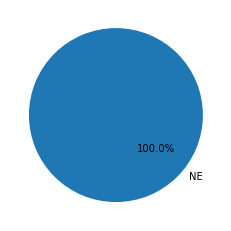

In [179]:
articl="""'\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'
"""
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(articl)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

import collections
# Create the defaultdict: ner_categories
ner_categories = collections.defaultdict(int)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()


## PLOYGLOT

polyglot? for ner and many more

Polyglot is yet another natural language processing library which uses ................WORD VECTORS.............. to perform simple tasks such as entity recognition. You might be wondering: why do I need to learn another library which uses word vectors? Don't I already have Gensim and Spacy? And you would be correct. The main benefit and difference of using Polyglot, however, is the wide variety of languages it supports. Polyglot has word embeddings for more than 130 languages!

In [4]:
import polyglot
from polyglot.text import Text, Word

In [5]:
from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 3))

IndexError: list index out of range

In [6]:
blob = """The Israeli Prime Minister Benjamin Netanyahu has warned that Iran poses a "threat to the entire world"."""
text = Text(blob)
text.entities


IndexError: list index out of range

In [1]:
import regex as re
import matplotlib.pyplot as plt

holy_grail = """ZOOT: Oh, you must see the doctors immediately!  No, no, please!  Lie down. [clap clap] 
PIGLET: Well, what seems to be the trouble?
GALAHAD: They're doctors?!
ZOOT: Uh, they have a basic medical training, yes.
GALAHAD: B-- but--
ZOOT: Oh, come, come.  You must try to rest.  Doctor Piglet!  Doctor Winston!  Practice your art.
WINSTON: Try to relax.
GALAHAD: Are you sure that's absolutely necessary?
PIGLET: We must examine you.
GALAHAD: There's nothing wrong with that!
PIGLET: Please.  We are doctors.
GALAHAD: Look!  This cannot be.  I am sworn to chastity.
PIGLET: Back to your bed!  At once!
GALAHAD: Torment me no longer.  I have seen the Grail!
PIGLET: There's no grail here.
GALAHAD: I have seen it!  I have seen it! [clank] I have seen--
GIRLS: Hello.
GALAHAD: Oh.
GIRLS: Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.  Hello.
GALAHAD: Zoot!
DINGO: No, I am Zoot's identical twin sister, Dingo.
GALAHAD: Oh, well, excuse me, I--
DINGO: Where are you going?
GALAHAD: I seek the Grail!  I have seen it, here in this castle!
DINGO: Oh no.  Oh, no!  Bad, bad Zoot!
GALAHAD: Well, what is it?
DINGO: Oh, wicked, bad, naughty Zoot!  She has been setting alight to our beacon, which, I have just remembered, is grail-shaped.  It's not the first time we've had this problem.
GALAHAD: It's not the real Grail?
DINGO: Oh, wicked, bad, naughty, evil Zoot!  She is a bad person and must pay the penalty.  Do you think this scene should have been cut?  We were so worried when the boys were writing it, but now, we're glad.  It's better than some of the previous scenes, I think.
LEFT HEAD: At least ours was better visually.
DENNIS: Well, at least ours was committed.  It wasn't just a string of pussy jokes.
OLD MAN: Get on with it.
TIM THE ENCHANTER: Yes, get on with it!
ARMY OF KNIGHTS: Yes, get on with it!
DINGO: Oh, I am enjoying this scene.
GOD: Get on with it!
DINGO: [sigh] Oh, wicked, wicked Zoot.  Oh, she is a naughty person, and she must pay the penalty.  And here in Castle Anthrax, we have but one punishment for setting alight the grail-shaped beacon.  You must tie her down on a bed and spank her.
GIRLS: A spanking!  A spanking!
DINGO: You must spank her well.  And after you have spanked her, you may deal with her as you like.  And then, spank me.
AMAZING: And spank me.
STUNNER: And me.
LOVELY: And me.
DINGO: Yes, yes, you must give us all a good spanking!
GIRLS: A spanking!  A spanking!  There is going to be a spanking tonight!
DINGO: And after the spanking, the oral sex.
GIRLS: The oral sex!  The oral sex!
GALAHAD: Well, I could stay a bit longer.
LAUNCELOT: Sir Galahad!
GALAHAD: Oh, hello.
LAUNCELOT: Quick!
GALAHAD: What?
LAUNCELOT: Quick!
GALAHAD: Why?
LAUNCELOT: You are in great peril!
DINGO: No he isn't.
LAUNCELOT: Silence, foul temptress!
GALAHAD: You know, she's got a point.
LAUNCELOT: Come on!  We will cover your escape!
GALAHAD: Look, I'm fine!
LAUNCELOT: Come on!
GIRLS: Sir Galahad!
GALAHAD: No.  Look, I can tackle this lot single-handed!
DINGO: Yes!  Let him tackle us single-handed!
GIRLS: Yes!  Let him tackle us single-handed!
LAUNCELOT: No, Sir Galahad.  Come on!
GALAHAD: No!  Really!  Honestly, I can cope.  I can handle this lot easily.
DINGO: Oh, yes.  Let him handle us easily.
GIRLS: Yes.  Let him handle us easily.
LAUNCELOT: No.  Quick!  Quick!
GALAHAD: Please!  I can defeat them!  There's only a hundred-and-fifty of them!
DINGO: Yes, yes!  He will beat us easily!  We haven't a chance.
GIRLS: We haven't a chance.  He will beat us easily... [boom] 
DINGO: Oh, shit.
LAUNCELOT: We were in the nick of time.  You were in great peril.
GALAHAD: I don't think I was.
LAUNCELOT: Yes you were.  You were in terrible peril.
GALAHAD: Look, let me go back in there and face the peril.
LAUNCELOT: No, it's too perilous.
GALAHAD: Look, it's my duty as a knight to sample as much peril as I can.
LAUNCELOT: No, we've got to find the Holy Grail.  Come on!
GALAHAD: Oh, let me have just a little bit of peril?
LAUNCELOT: No.  It's unhealthy.
GALAHAD: I bet you're gay.
LAUNCELOT: No I'm not
NARRATOR: Sir Launcelot had saved Sir Galahad from almost certain temptation, but they were still no nearer the Grail.  Meanwhile, King Arthur and Sir Bedevere, not more than a swallow's flight away, had discovered something.  Oh, that's an unladen swallow's flight, obviously.  I mean, they were more than two laden swallows' flights away-- four, really, if they had a coconut on a line between them.  I mean, if the birds were walking and dragging--
CROWD: Get on with it!
NARRATOR: Oh, anyway.  On to scene twenty-four, which is a smashing scene with some lovely acting, in which Arthur discovers a vital clue, and in which there aren't any swallows, although I think you can hear a starling-- oooh
SCENE 12:
OLD MAN: Heh, hee ha ha hee hee!  Hee hee hee ha ha ha...
ARTHUR: And this enchanter of whom you speak, he has seen the Grail?
OLD MAN: ... Ha ha ha ha!  Heh, hee ha ha hee!  Ha hee ha!  Ha ha ha ha...
ARTHUR: Where does he live?
OLD MAN: ... Heh heh heh heh...
ARTHUR: Old man, where does he live?
OLD MAN: ... Hee ha ha ha.  He knows of a cave, a cave which no man has entered.
ARTHUR: And the Grail.  The Grail is there?
OLD MAN: There is much danger, for beyond the cave lies the Gorge of Eternal Peril, which no man has ever crossed.
ARTHUR: But the Grail!  Where is the Grail?!
OLD MAN: Seek you the Bridge of Death.
ARTHUR: The Bridge of Death, which leads to the Grail?
OLD MAN: Heh, hee hee hee hee!  Ha ha ha ha ha!  Hee ha ha..
SCENE 13: [spooky music] [music stops] 
HEAD KNIGHT OF NI: Ni!
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!  Ni!
ARTHUR: Who are you?
HEAD KNIGHT: We are the Knights Who Say...  'Ni'!
RANDOM: Ni!
ARTHUR: No!  Not the Knights Who Say 'Ni'!
HEAD KNIGHT: The same!
BEDEVERE: Who are they?
HEAD KNIGHT: We are the keepers of the sacred words: Ni, Peng, and Neee-wom!
RANDOM: Neee-wom!
ARTHUR: Those who hear them seldom live to tell the tale!
HEAD KNIGHT: The Knights Who Say 'Ni' demand a sacrifice!
ARTHUR: Knights of Ni, we are but simple travellers who seek the enchanter who lives beyond these woods.
HEAD KNIGHT: Ni!
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!  Ni! ...
ARTHUR: Ow!  Ow!  Ow!  Agh!
HEAD KNIGHT: We shall say 'ni' again to you if you do not appease us.
ARTHUR: Well, what is it you want?
HEAD KNIGHT: We want...  a shrubbery! [dramatic chord] 
ARTHUR: A what?
KNIGHTS OF NI: Ni!  Ni!  Ni!  Ni!
ARTHUR and PARTY: Ow!  Oh!
ARTHUR: Please, please!  No more!  We will find you a shrubbery.
HEAD KNIGHT: You must return here with a shrubbery or else you will never pass through this wood alive!
ARTHUR: O Knights of Ni, you are just and fair, and we will return with a shrubbery.
HEAD KNIGHT: One that looks nice.
ARTHUR: Of course.
HEAD KNIGHT: And not too expensive.
ARTHUR: Yes.
HEAD KNIGHT: Now...  go [trumpets] """


In [2]:
import re

res = re.findall(r'\w*!', holy_grail)
res

['immediately!',
 'please!',
 '!',
 'Piglet!',
 'Winston!',
 'that!',
 'Look!',
 'bed!',
 'once!',
 'Grail!',
 'it!',
 'it!',
 'Zoot!',
 'Grail!',
 'castle!',
 'no!',
 'Zoot!',
 'Zoot!',
 'Zoot!',
 'it!',
 'it!',
 'it!',
 'spanking!',
 'spanking!',
 'spanking!',
 'spanking!',
 'spanking!',
 'tonight!',
 'sex!',
 'sex!',
 'Galahad!',
 'Quick!',
 'Quick!',
 'peril!',
 'temptress!',
 'on!',
 'escape!',
 'fine!',
 'on!',
 'Galahad!',
 'handed!',
 'Yes!',
 'handed!',
 'Yes!',
 'handed!',
 'on!',
 'No!',
 'Really!',
 'Quick!',
 'Quick!',
 'Please!',
 'them!',
 'them!',
 'yes!',
 'easily!',
 'on!',
 'it!',
 'hee!',
 'ha!',
 'hee!',
 'ha!',
 'Grail!',
 '!',
 'hee!',
 'ha!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ni!',
 '!',
 'Ni!',
 'No!',
 '!',
 'same!',
 'wom!',
 'wom!',
 'tale!',
 'sacrifice!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ow!',
 'Ow!',
 'Ow!',
 'Agh!',
 'shrubbery!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ni!',
 'Ow!',
 'Oh!',
 'please!',
 'more!',
 'alive!']

In [68]:

      
# using regex( findall() )
# to extract words from string
res = re.findall(r'\w*:', holy_grail)
res

['ZOOT:',
 'PIGLET:',
 'GALAHAD:',
 'ZOOT:',
 'GALAHAD:',
 'ZOOT:',
 'WINSTON:',
 'GALAHAD:',
 'PIGLET:',
 'GALAHAD:',
 'PIGLET:',
 'GALAHAD:',
 'PIGLET:',
 'GALAHAD:',
 'PIGLET:',
 'GALAHAD:',
 'GIRLS:',
 'GALAHAD:',
 'GIRLS:',
 'GALAHAD:',
 'DINGO:',
 'GALAHAD:',
 'DINGO:',
 'GALAHAD:',
 'DINGO:',
 'GALAHAD:',
 'DINGO:',
 'GALAHAD:',
 'DINGO:',
 'HEAD:',
 'DENNIS:',
 'MAN:',
 'ENCHANTER:',
 'KNIGHTS:',
 'DINGO:',
 'GOD:',
 'DINGO:',
 'GIRLS:',
 'DINGO:',
 'AMAZING:',
 'STUNNER:',
 'LOVELY:',
 'DINGO:',
 'GIRLS:',
 'DINGO:',
 'GIRLS:',
 'GALAHAD:',
 'LAUNCELOT:',
 'GALAHAD:',
 'LAUNCELOT:',
 'GALAHAD:',
 'LAUNCELOT:',
 'GALAHAD:',
 'LAUNCELOT:',
 'DINGO:',
 'LAUNCELOT:',
 'GALAHAD:',
 'LAUNCELOT:',
 'GALAHAD:',
 'LAUNCELOT:',
 'GIRLS:',
 'GALAHAD:',
 'DINGO:',
 'GIRLS:',
 'LAUNCELOT:',
 'GALAHAD:',
 'DINGO:',
 'GIRLS:',
 'LAUNCELOT:',
 'GALAHAD:',
 'DINGO:',
 'GIRLS:',
 'DINGO:',
 'LAUNCELOT:',
 'GALAHAD:',
 'LAUNCELOT:',
 'GALAHAD:',
 'LAUNCELOT:',
 'GALAHAD:',
 'LAUNCELOT:',
 'GALAH

In [75]:
import numpy as np
import pandas as pd
 
# function to get unique values

x = np.array(res)
print(np.unique(x))

pd.value_counts(x)

['12:' '13:' 'AMAZING:' 'ARTHUR:' 'BEDEVERE:' 'CROWD:' 'DENNIS:' 'DINGO:'
 'ENCHANTER:' 'GALAHAD:' 'GIRLS:' 'GOD:' 'HEAD:' 'KNIGHT:' 'KNIGHTS:'
 'LAUNCELOT:' 'LOVELY:' 'MAN:' 'NARRATOR:' 'NI:' 'PARTY:' 'PIGLET:'
 'RANDOM:' 'STUNNER:' 'WINSTON:' 'ZOOT:' 'words:']


GALAHAD:      27
ARTHUR:       17
LAUNCELOT:    15
DINGO:        15
KNIGHT:       11
GIRLS:         9
MAN:           8
PIGLET:        5
NI:            4
ZOOT:          3
RANDOM:        2
NARRATOR:      2
CROWD:         1
PARTY:         1
ENCHANTER:     1
12:            1
AMAZING:       1
words:         1
BEDEVERE:      1
STUNNER:       1
HEAD:          1
KNIGHTS:       1
WINSTON:       1
LOVELY:        1
13:            1
GOD:           1
DENNIS:        1
dtype: int64